In [100]:
import os #(operating system)
import pandas as pd # (excel like)
import matplotlib.pyplot as plt #(visualization)
import seaborn as sns # (aesthetic visualization)

##### Merge 12 months of sales data into a single csv file 

In [101]:
pwd

'/Users/prakumar87/Documents/AI_class/Stats/Analysis'

In [102]:
ls

SalesAnalysis/                   Sales_Analysis_Production.ipynb


In [103]:
ls SalesAnalysis/

Sales_Data/


In [106]:
ls SalesAnalysis/Sales_Data/

Sales_April_2019.csv*     Sales_January_2019.csv*   Sales_May_2019.csv*
Sales_August_2019.csv*    Sales_July_2019.csv*      Sales_November_2019.csv*
Sales_December_2019.csv*  Sales_June_2019.csv*      Sales_October_2019.csv*
Sales_February_2019.csv*  Sales_March_2019.csv*     Sales_September_2019.csv*


In [105]:
mv SalesAnalysis/Sales_Data/all_data.csv ../../

In [107]:
os.listdir("SalesAnalysis/Sales_Data")

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [108]:
files =[file for file in os.listdir("SalesAnalysis/Sales_Data")]

In [109]:
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [110]:
for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [112]:
pd.read_csv('SalesAnalysis/Sales_Data/Sales_April_2019.csv').shape

(18383, 6)

In [113]:
pd.read_csv('SalesAnalysis/Sales_Data/Sales_May_2019.csv').shape

(16635, 6)

In [114]:
pd.read_csv('SalesAnalysis/Sales_Data/Sales_January_2019.csv').shape

(9723, 6)

In [115]:
pd.read_csv('SalesAnalysis/Sales_Data/Sales_February_2019.csv').shape

(12036, 6)

In [117]:
pd.DataFrame().shape

(0, 0)

In [118]:
path = "SalesAnalysis/Sales_Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(186850, 6)

In [121]:
type(all_data)

pandas.core.frame.DataFrame

In [119]:
ls SalesAnalysis/Sales_Data/

Sales_April_2019.csv*     Sales_January_2019.csv*   Sales_May_2019.csv*
Sales_August_2019.csv*    Sales_July_2019.csv*      Sales_November_2019.csv*
Sales_December_2019.csv*  Sales_June_2019.csv*      Sales_October_2019.csv*
Sales_February_2019.csv*  Sales_March_2019.csv*     Sales_September_2019.csv*


##### convert it into dataset

In [122]:
all_data.to_csv('SalesAnalysis/Sales_Data/all_data.csv',index=False)

In [123]:
ls SalesAnalysis/Sales_Data/

Sales_April_2019.csv*     Sales_July_2019.csv*      Sales_October_2019.csv*
Sales_August_2019.csv*    Sales_June_2019.csv*      Sales_September_2019.csv*
Sales_December_2019.csv*  Sales_March_2019.csv*     all_data.csv
Sales_February_2019.csv*  Sales_May_2019.csv*
Sales_January_2019.csv*   Sales_November_2019.csv*


##### Data cleaning and formatting

In [124]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [125]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Looking for missing values

In [127]:
all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
13617,False,False,False,False,False,False
13618,False,False,False,False,False,False
13619,False,False,False,False,False,False
13620,False,False,False,False,False,False


In [128]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [129]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

##### What is the best month for sale?

In [130]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [132]:
'04/19/19 08:46'.split('/')[0]

'04'

In [133]:
def month(x):
    return x.split('/')[0]

##### add month col

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
all_data['Month']=all_data['Order Date'].apply(month)

In [136]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [138]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [139]:
all_data['Month']=all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [140]:
all_data['Month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [141]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185950

In [142]:
all_data=all_data[~filter]

In [143]:
all_data.shape

(185950, 7)

In [144]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [145]:
all_data['Month']=all_data['Month'].astype(int)

In [146]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [147]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [148]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [149]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [150]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

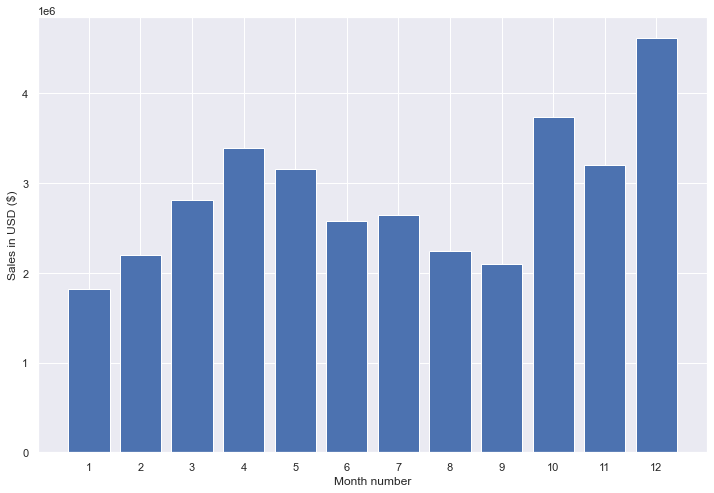

In [151]:
months=range(1,13) #1...12
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##### Which city has max order

In [152]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [154]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [155]:
def city(x):
    return x.split(',')[1]

In [156]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [159]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

In [160]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [165]:
all_data.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

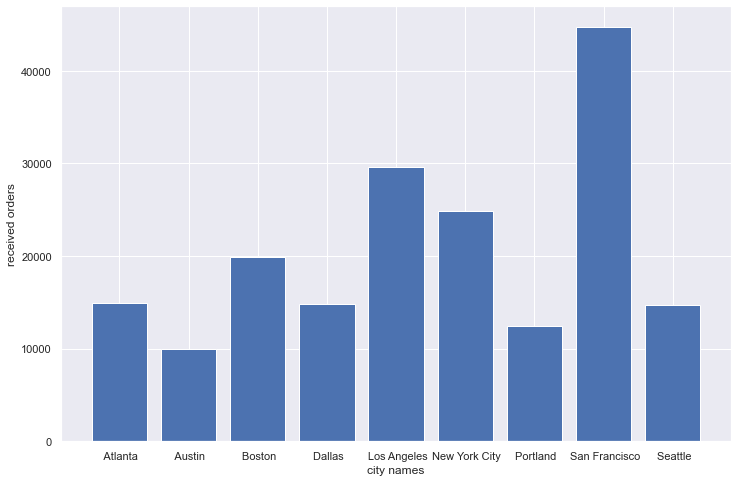

In [166]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
#plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

In [167]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


<AxesSubplot:xlabel='city', ylabel='count'>

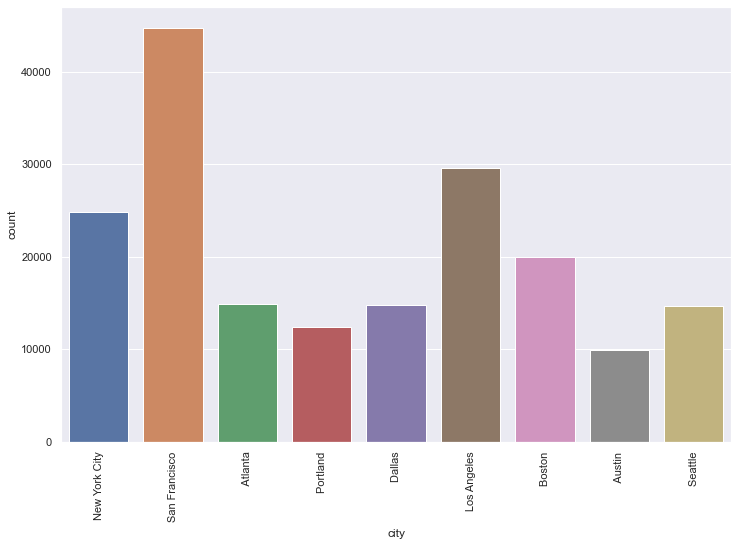

In [168]:
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
sns.countplot(x='city',data=all_data)

##### What time should we display advertisements to maximise for product purchase?

In [169]:
all_data['Order Date'][0].dtype

dtype('O')

In [171]:
 pd.to_datetime(all_data['Order Date']).dt.hour

0         0
1         7
2        18
3        15
4        12
         ..
13617    19
13618    19
13619    18
13620    18
13621    14
Name: Order Date, Length: 185950, dtype: int64

In [172]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [173]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [182]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [183]:
# keys=[]
# hour=[]
# for key,hour_df in all_data.groupby('Hour'):
#     keys.append(key)
#     hour.append(len(hour_df))

In [186]:
#keys

In [187]:
#len(hour)

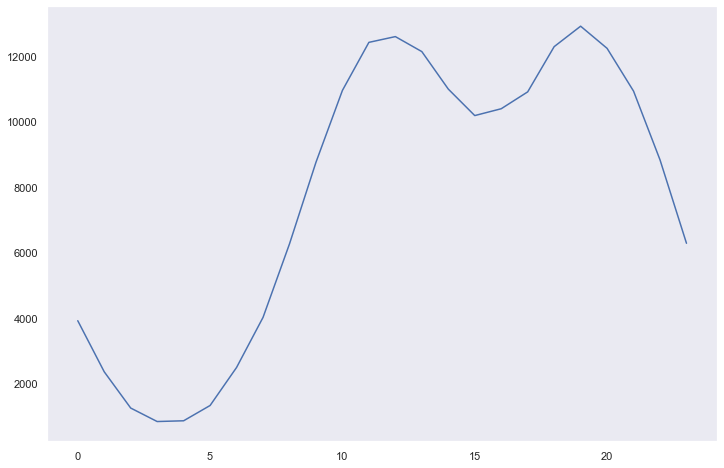

In [188]:
plt.grid()
plt.plot(keys,hour)

##### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

<AxesSubplot:xlabel='Product'>

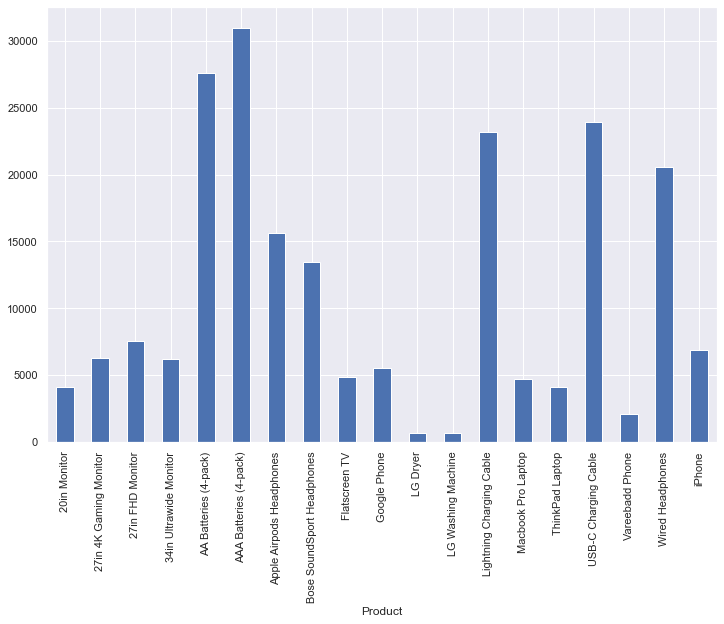

In [190]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [191]:
#all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [192]:
#all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [193]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [194]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [195]:
all_data.groupby('Product')['Quantity Ordered'].sum().index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [196]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [200]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [201]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

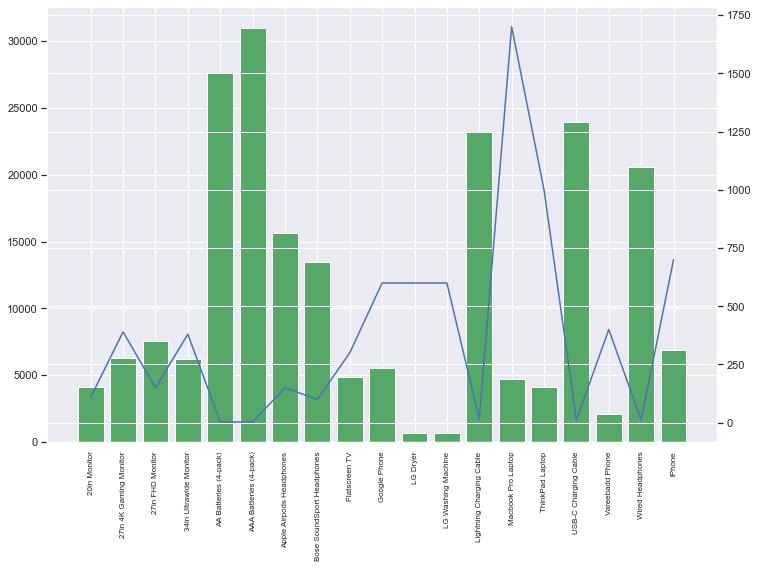

In [202]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [203]:
all_data.shape

(185950, 10)

In [204]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


##### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [205]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City,14
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston,14


In [206]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [207]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"


In [208]:
df.shape

(14649, 11)

In [209]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

In [210]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City,18,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
13570,222863,27in FHD Monitor,1,149.99,06/07/19 11:05,"222 Walnut St, Austin, TX 73301",6,149.99,Austin,11,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,iPhone,1,700.00,06/16/19 13:53,"505 North St, New York City, NY 10001",6,700.00,New York City,13,"iPhone,Apple Airpods Headphones"
13591,222882,Apple Airpods Headphones,1,150.00,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,150.00,Los Angeles,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12,"Google Phone,USB-C Charging Cable"


<AxesSubplot:ylabel='Grouped'>

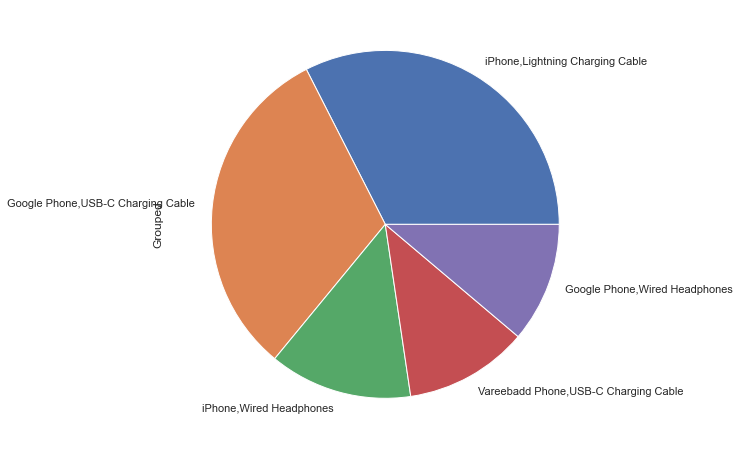

In [214]:
df2['Grouped'].value_counts()[0:5].plot.pie()

<AxesSubplot:ylabel='Grouped'>

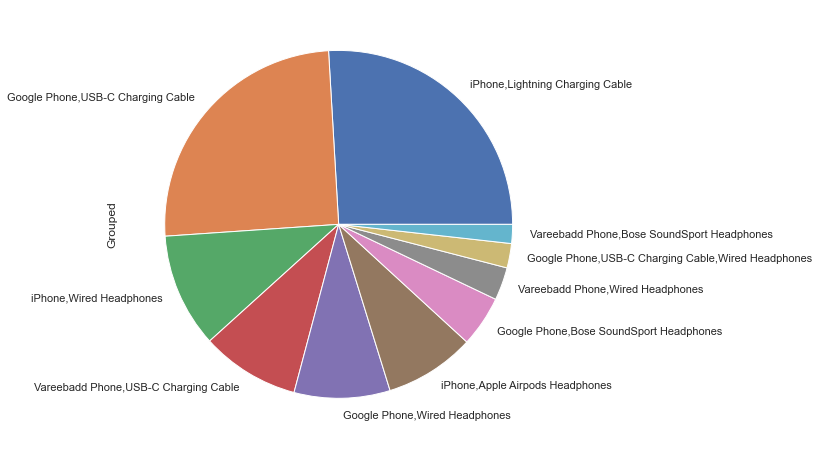

In [213]:
df2['Grouped'].value_counts()[0:10].plot.pie()

In [215]:
#!pip install plotly

In [216]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [217]:
df2['Grouped'].value_counts()[0:5]

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

In [218]:
df['Grouped'].value_counts()[0:5].index

Index(['iPhone,Lightning Charging Cable', 'Google Phone,USB-C Charging Cable',
       'iPhone,Wired Headphones', 'Vareebadd Phone,USB-C Charging Cable',
       'Google Phone,Wired Headphones'],
      dtype='object')

In [219]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [222]:
values=df2['Grouped'].value_counts()[0:10]
labels=df['Grouped'].value_counts()[0:10].index

In [223]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [224]:
iplot([trace])